In [140]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
%matplotlib inline

In [141]:
def get_historic_price(symbol, exchange='coinbase', after='2016-04-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={'periods': time_interval, 'after': str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result'][time_interval], columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [181]:
time_interval = '14400'   # Minute: 60, Hour: 3600, 4-Hours: 14400,  Day: 86400
time_length = 100         #time length going back from today

from_when = (pd.Timestamp.now() - pd.offsets.Day(time_length))
btc = get_historic_price('btc', 'coinbase', after=from_when)
btc = btc.drop(['NA'], axis=1)
btc_perc = btc.pct_change()*100
df = pd.merge(left=btc, right=btc_perc, left_index=True, right_index=True)
df = df.rename(columns={"OpenPrice_y":"OpenPrice_%", "HighPrice_y":"HighPrice_%", "LowPrice_y":"LowPrice_%", "ClosePrice_y":"ClosePrice_%", "Volume_y":"Volume_%"})
#close_change = df.iloc[-1]['ClosePrice_%'] 
df.head(3)

,OpenPrice_x,HighPrice_x,LowPrice_x,ClosePrice_x,Volume_x,OpenPrice_%,HighPrice_%,LowPrice_%,ClosePrice_%,Volume_%
CloseTime,,,,,,,,,,
2021-01-12 20:00:00,33834.08,35488.0,33825.19,34669.89,6648.918165,NaN,NaN,NaN,NaN,NaN
2021-01-13 00:00:00,34656.03,35000.0,33300.00,34038.98,6805.282552,2.429355,-1.375113,-1.552659,-1.819763,2.351727
2021-01-13 04:00:00,34035.53,34350.0,32309.04,33787.42,9892.910995,-1.790453,-1.857143,-2.975856,-0.739035,45.371054


In [176]:
df.describe()

,OpenPrice_x,HighPrice_x,LowPrice_x,ClosePrice_x,Volume_x,OpenPrice_%,HighPrice_%,LowPrice_%,ClosePrice_%,Volume_%
count,601.000000,601.000000,601.000000,601.000000,601.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,49186.588403,49878.414260,48456.229551,49221.559052,3757.506708,0.100699,0.087523,0.102763,0.097423,18.126521
std,9667.602029,9632.167806,9661.658655,9650.097002,2763.957046,2.039678,1.682546,2.142461,2.038004,102.541982
min,30398.020000,31030.430000,28732.000000,30398.010000,551.859774,-7.691536,-5.842304,-14.537034,-7.688954,-80.571366
25%,39088.240000,39669.660000,38250.000000,39125.140000,2120.305428,-0.941900,-0.720565,-0.802918,-0.934456,-29.862876
50%,51320.930000,52200.000000,50610.000000,51329.200000,3081.009970,0.094948,0.039248,0.130628,0.096240,-5.298827
75%,57311.580000,57784.070000,56585.000000,57311.580000,4497.092362,1.104879,0.878938,1.187527,1.106706,36.006979
max,64583.110000,64899.000000,63666.000000,64583.110000,22010.597980,14.799028,13.555893,14.072462,14.806794,1637.330853


<ipython-input-183-ea169417fea1>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


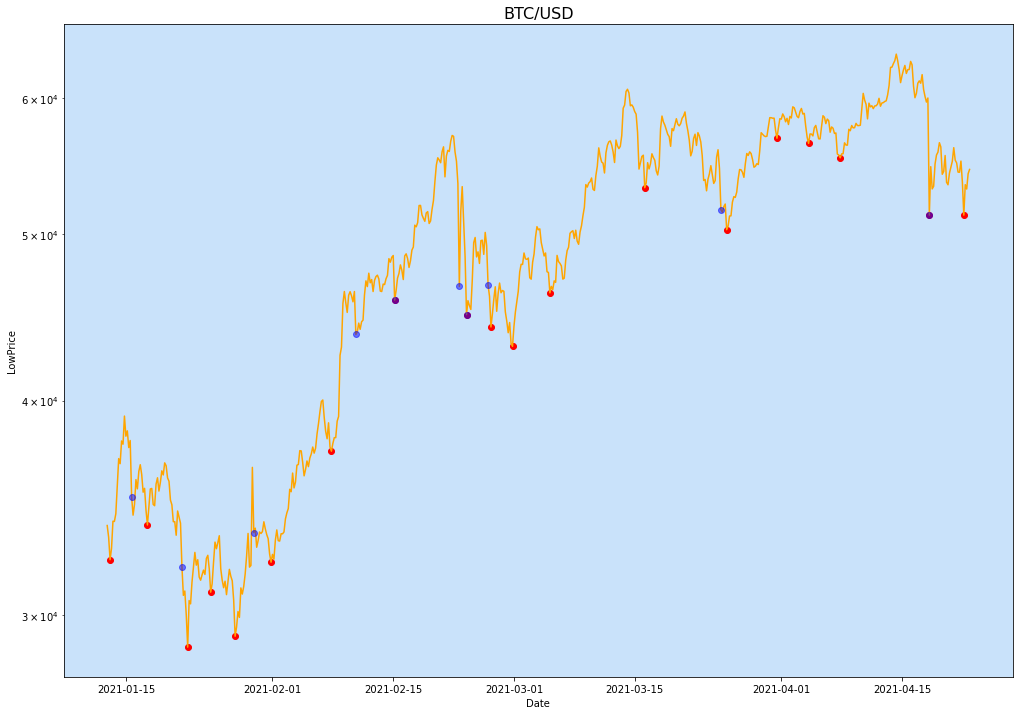

In [183]:
df_lowprice = df[df['LowPrice_%']<=-5]

plt.figure(figsize=(17, 12))
plt.yscale('log')
plt.xlabel('Date',size=10)     # set x-axis label and specific size
plt.ylabel('LowPrice',size=10)    # set y-axis label and specific size
plt.title('BTC/USD',size=16) # set plot title with specific size

n = 10  # number of points to be checked before and after
df['min'] = df.iloc[argrelextrema(df.LowPrice_x.values, np.less_equal, order=n)[0]]['LowPrice_x']
#df['max'] = df.iloc[argrelextrema(df.LowPrice_x.values, np.greater_equal, order=n)[0]]['LowPrice_x']

plt.plot(df.index, df.LowPrice_x, color='orange')
plt.plot(df_lowprice.LowPrice_x, 'bo', alpha=0.5)
plt.scatter(df.index, df['min'], c='r')  
#plt.scatter(df.index, df['max'], c='g')
ax = plt.axes() 
ax.set_facecolor("#C9E2FA") 
#plt.savefig('Plot_with_Matplotlib_in_Python.png', dpi=150) # save the plot as PNG file with dpi=150